<a href="https://colab.research.google.com/github/sat0304/future_sales/blob/main/28_02_2023_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальный проект

## В данном задании необходимо предсказать покупки товаров в ноябре 2015 года на основе таблицы продаж за прошедшие 2 года с января 2013 по октябрь 2015.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


# 1. Чтение и преобразование исходных данных


---



**Таблица с категориями**

In [ ]:
it_category = pd.read_csv(
    filepath_or_buffer = path+
    '/Colab Notebooks/Final_prof/item_categories.csv',
    sep = ',')

***Свойства таблицы с категориями***

In [ ]:
# it_category.nunique()
# it_category.isna().sum()
# it_category.info()
print(it_category)
print()
print(it_category.nunique())

           item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]

item_category_name    84
item_category_id      84
dtype: int64


***Разделение таблицы категорий товаров на два столбца.***

In [ ]:
def read_csv_category():
    df_cat = it_category
    item_category_name = df_cat['item_category_name'].tolist()
    item_category_id = df_cat['item_category_id'].tolist()
    return item_category_name, item_category_id

***Добавление в столбец наименований категорий товаров одинарных кавычек справа и слева.***

In [ ]:
def change_column(cleaned_it):
    result_vector = []
    for i in range(len(cleaned_it)):
        result_vector.append('"'
            + cleaned_it[i] + '"')
    return result_vector

***Объединение таблицы категорий товаров из двух столбцов.***

In [ ]:
category_items, item_category_ids = read_csv_category()
vector_cat = change_column(category_items)
df_cat = pd.DataFrame({'item_category_name': vector_cat,
                        'item_category_id': item_category_ids})
df_cat.to_csv('item_categories.csv', index=False)

In [ ]:
df_cat

,item_category_name,item_category_id
0,"""PC - Гарнитуры/Наушники""",0
1,"""Аксессуары - PS2""",1
2,"""Аксессуары - PS3""",2
3,"""Аксессуары - PS4""",3
4,"""Аксессуары - PSP""",4
...,...,...
79,"""Служебные""",79
80,"""Служебные - Билеты""",80
81,"""Чистые носители (шпиль)""",81
82,"""Чистые носители (штучные)""",82


***Таблица с товарами***

In [ ]:
items = pd.read_csv(
    filepath_or_buffer = path + 
    "/Colab Notebooks/Final_prof/items.csv",
    sep = ',')

***Свойства таблицы с товарами***

In [ ]:
# items.isna().sum()
# items.info()
print(items)
print()
print(items.nunique())

                                               item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...            

***Разделение таблицы товаров на три столбца.***

In [ ]:
def read_csv_items():
    df = items
    name_item = df['item_name'].tolist()
    item_id = df['item_id'].tolist()
    item_category_id = df['item_category_id'].tolist()
    return name_item, item_id, item_category_id

***Удаление в столбце товаров лишних пробелов, знаков: !, *, /.***

In [ ]:
def clean_list(vector_items):
    cleaned_items = []
    for i in range(len(vector_items)):
        char = vector_items[i]
        char = re.sub(' +', ' ', char)
        first_rem = re.match(r'^[*|/|!]+', char)
        last_rem = re.match(r'(.+\s[D])$', char)
        if first_rem and last_rem:
            char = char.replace(first_rem.group(0), '')
            char = char.replace(char[-1], '')
            char = re.sub(r'^ +', '', char)
            char = re.sub(r' +$', '', char)
            cleaned_items.append(char)
        elif first_rem:
            char = char.replace(first_rem.group(0), '')
            char = re.sub(r'^ +', '', char)
            cleaned_items.append(char)
        elif last_rem:
            char = char.replace(char[-1], '')
            char = re.sub(r' +$', '', char)
            cleaned_items.append(char)
        else:
            cleaned_items.append(char)
    return cleaned_items

***Добавление кавычек в столбец наименований товаров.***

In [ ]:
def change_column(cleaned_it):
    result_vector = []
    for i in range(len(cleaned_it)):
        result_vector.append('"'
            + cleaned_it[i] + '"')
    return result_vector

In [ ]:
name_items, item_ids, item_category_ids = read_csv_items()
cleaned_items = clean_list(name_items)
vector_items = change_column(cleaned_items)
df_items = pd.DataFrame({'item_name': vector_items,
                    'item_id': item_ids,
                    'item_category_id': item_category_ids})
df_items.to_csv('items.csv', index=False)

In [ ]:
df_items

,item_name,item_id,item_category_id
0,"""ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)""",0,40
1,"""ABBYY FineReader 12 Professional Edition Full...",1,76
2,"""В ЛУЧАХ СЛАВЫ (UNV)""",2,40
3,"""ГОЛУБАЯ ВОЛНА (Univ)""",3,40
4,"""КОРОБКА (СТЕКЛО)""",4,40
...,...,...,...
22165,"""Ядерный титбит 2 [PC, Цифровая версия]""",22165,31
22166,"""Язык запросов 1С:Предприятия [Цифровая версия]""",22166,54
22167,"""Язык запросов 1С:Предприятия 8 (+CD). Хрустал...",22167,49
22168,"""Яйцо для Little Inu""",22168,62


**Таблица продаж для обучения**

In [ ]:
sales_train = pd.read_csv(
    filepath_or_buffer = path + 
    "/Colab Notebooks/Final_prof/sales_train.csv",
    sep = ',')

***Свойства таблицы продаж***

In [ ]:
# sales_train.isna().sum()
# sales_train.info()
print(sales_train)
print()
print(sales_train.nunique())

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
293

***Таблица с образцом результата***

In [ ]:
sample_submission = pd.read_csv(
    filepath_or_buffer = path + 
    "/Colab Notebooks/Final_prof/sample_submission.csv",
    sep = ',')

***Свойства таблицы с образцами результатов***

In [ ]:
# sample_submission.isna().sum()
# sample_submission.info()
print(sample_submission)
print()
print(sample_submission.nunique())

            ID  item_cnt_month
0            0             0.5
1            1             0.5
2            2             0.5
3            3             0.5
4            4             0.5
...        ...             ...
214195  214195             0.5
214196  214196             0.5
214197  214197             0.5
214198  214198             0.5
214199  214199             0.5

[214200 rows x 2 columns]

ID                214200
item_cnt_month         1
dtype: int64


***Таблица с наименованием магазинов***

In [ ]:
shops = pd.read_csv(
    filepath_or_buffer = path + 
    "/Colab Notebooks/Final_prof/shops.csv",
    sep = ',')

***Свойства таблицы с наименованием магазинов***

In [ ]:
# shops.isna().sum()
# shops.info()
print(shops)
print()
print(shops.nunique())

                                          shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                      

***Разделение таблицы магазинов на два столбца.***

In [ ]:
def read_csv_shops():
    df_shop = shops
    shop_item = df_shop['shop_name'].tolist()
    shop_id = df_shop['shop_id'].tolist()
    return shop_item, shop_id

Удаление в наименованиях магазинов символов !, ? и т.д.

In [ ]:
def clean_list(vector_items):
    cleaned_items = []
    for i in range(len(vector_items)):
        char = vector_items[i]
        char = re.sub(' +', ' ', char)
        first_rem = re.match(r'^[!]+', char)
        last_rem = re.match(r'(.+\w[?|²])$', char)
        if first_rem and last_rem:
            char = char.replace(first_rem.group(0), '')
            char = char.replace(char[-1], '2')
            char = re.sub(r'^ +', '', char)
            char = re.sub(r' +$', '', char)
            cleaned_items.append(char)
        elif first_rem:
            char = char.replace(first_rem.group(0), '')
            char = re.sub(r'^ +', '', char)
            cleaned_items.append(char)
        elif last_rem:
            char = char.replace(char[-1], '2')
            char = re.sub(r' +$', '', char)
            cleaned_items.append(char)
        else:
            cleaned_items.append(char)
    return cleaned_items

***Добавление в таблицу магазинов кавычек.***

In [ ]:
def change_column(cleaned_it):
    result_vector = []
    for i in range(len(cleaned_it)):
        result_vector.append('"'
            + cleaned_it[i] + '"')
    return result_vector

In [ ]:
shop_items, shop_ids = read_csv_shops()
cleaned_shops = clean_list(shop_items)
cleaned_shops[0] = 'Якутск Орджоникидзе, 56'
cleaned_shops[1] = 'Якутск ТЦ "Центральный"'
vector_shops = change_column(cleaned_shops)
df_shop = pd.DataFrame({'shop_name': vector_shops,
                    'shop_id': shop_ids})
df_shop.to_csv('shops.csv', index=False)

In [ ]:
# df_shop['shop_name'].duplicated()
print(df_shop)
print()
print(df_shop.nunique())

                                            shop_name  shop_id
0                           "Якутск Орджоникидзе, 56"        0
1                           "Якутск ТЦ "Центральный""        1
2                                  "Адыгея ТЦ "Мега""        2
3                    "Балашиха ТРК "Октябрь-Киномир""        3
4                          "Волжский ТЦ "Волга Молл""        4
5                            "Вологда ТРЦ "Мармелад""        5
6                        "Воронеж (Плехановская, 13)"        6
7                            "Воронеж ТРЦ "Максимир""        7
8                      "Воронеж ТРЦ Сити-Парк "Град""        8
9                                 "Выездная Торговля"        9
10                       "Жуковский ул. Чкалова 39м2"       10
11                       "Жуковский ул. Чкалова 39м2"       11
12                              "Интернет-магазин ЧС"       12
13                              "Казань ТЦ "Бехетле""       13
14                          "Казань ТЦ "ПаркХаус" II"  

***Тестовая таблица для проверки модели***

In [ ]:
test = pd.read_csv(
    filepath_or_buffer = path + 
    "/Colab Notebooks/Final_prof/test.csv",
    sep = ',')

***Свойства тестовой таблицы***

In [ ]:
# test.nunique()
# test.isna().sum()
# test.info()
print(test)
print()
print(test.nunique())

            ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]

ID         214200
shop_id        42
item_id      5100
dtype: int64


**График распределения проданных товаров по категориям**

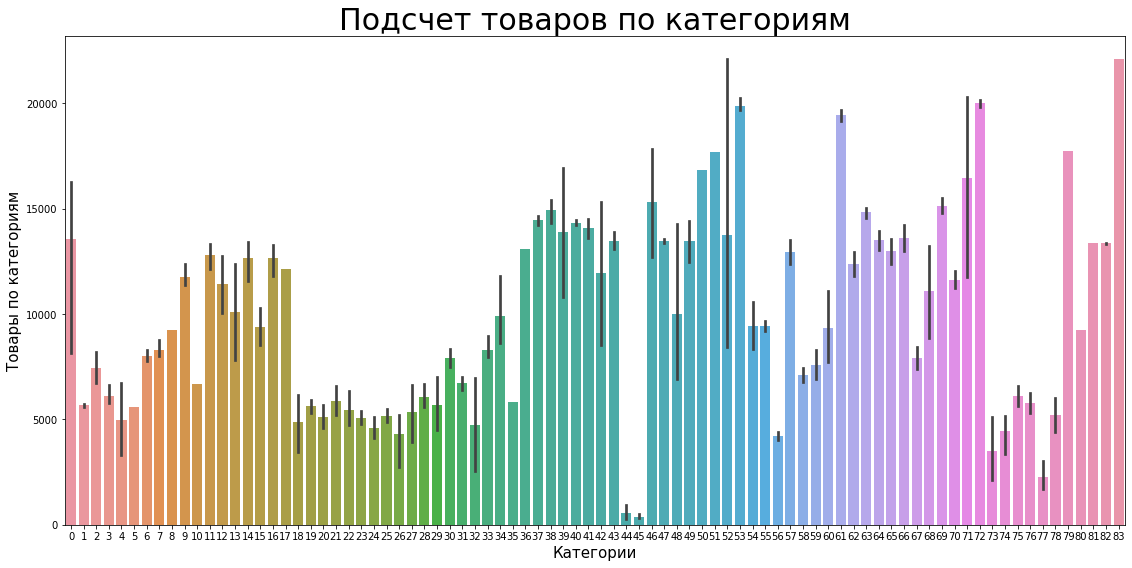

In [ ]:
plt.rcParams['figure.figsize'] = (19, 9)
# sns.scatterplot(data=items, x='item_category_id', y='item_id')
sns.barplot(data=items, x='item_category_id', y='item_id')
# sns.boxenplot(data=items, x='item_category_id', y='item_id')
# sns.violinplot(data=items, x='item_category_id', y='item_id')
# sns.countplot(data=items, y='item_id')
# sns.countplot(data=items, x='item_category_id')
# sns.pointplot(data=items, x='item_category_id', y='item_id')
# sns.lineplot(data=items, x='item_category_id', y='item_id')
# sns.stripplot(data=items, x='item_category_id', y='item_id')
# sns.swarmplot(data=items, x='item_category_id', y='item_id')
# sns.pairplot(data=items, x_vars='item_category_id', y_vars='item_id', kind='hist')
# sns.pairplot(items, kind="kde")
plt.title('Подсчет товаров по категориям', fontsize = 30)
plt.xlabel('Категории', fontsize = 15)
plt.ylabel('Товары по категориям', fontsize = 15)
plt.show()

***Количество проданных товаров имеет максимумы в декабре месяце. А также, ежегодные продажи уменьшаются.***

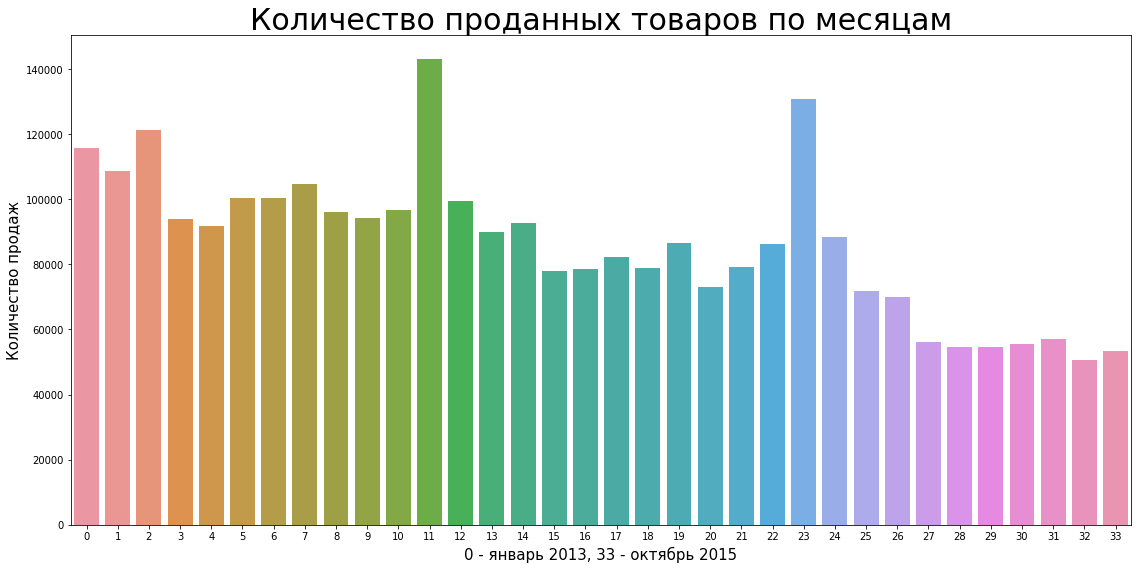

In [ ]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(data=sales_train, x='date_block_num')
plt.title('Количество проданных товаров по месяцам', fontsize = 30)
plt.xlabel('0 - январь 2013, 33 - октябрь 2015', fontsize = 15)
plt.ylabel('Количество продаж', fontsize = 15)
plt.show()

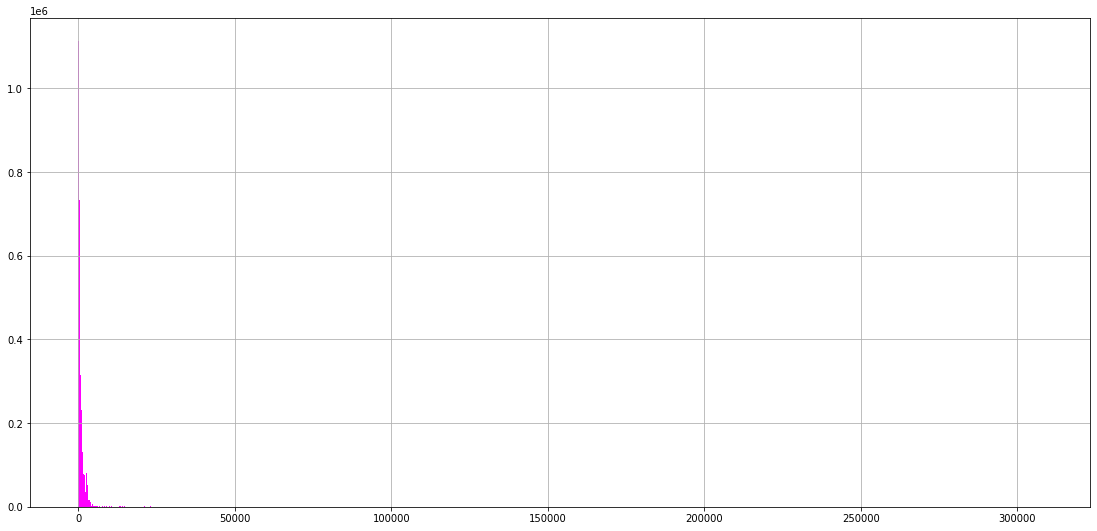

In [ ]:
sales_train['item_price'].hist(bins=1000, color = 'magenta')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80e4692400>,
      dtype=object)

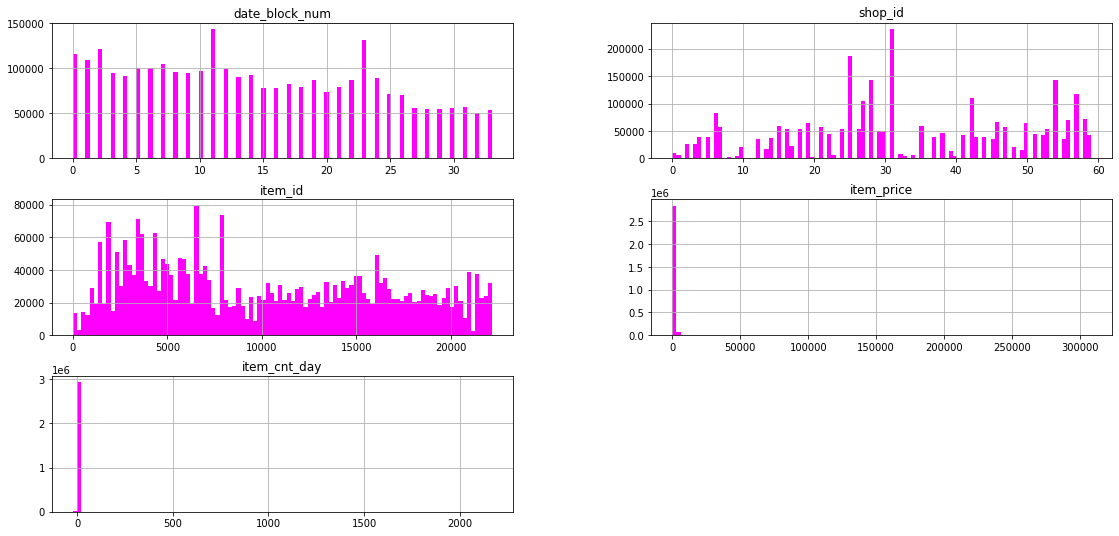

In [ ]:
sales_train.hist(bins=100, color = 'fuchsia')

Основная масса товаров имеет невысокую стоимость до 3000 тыс. руб. 

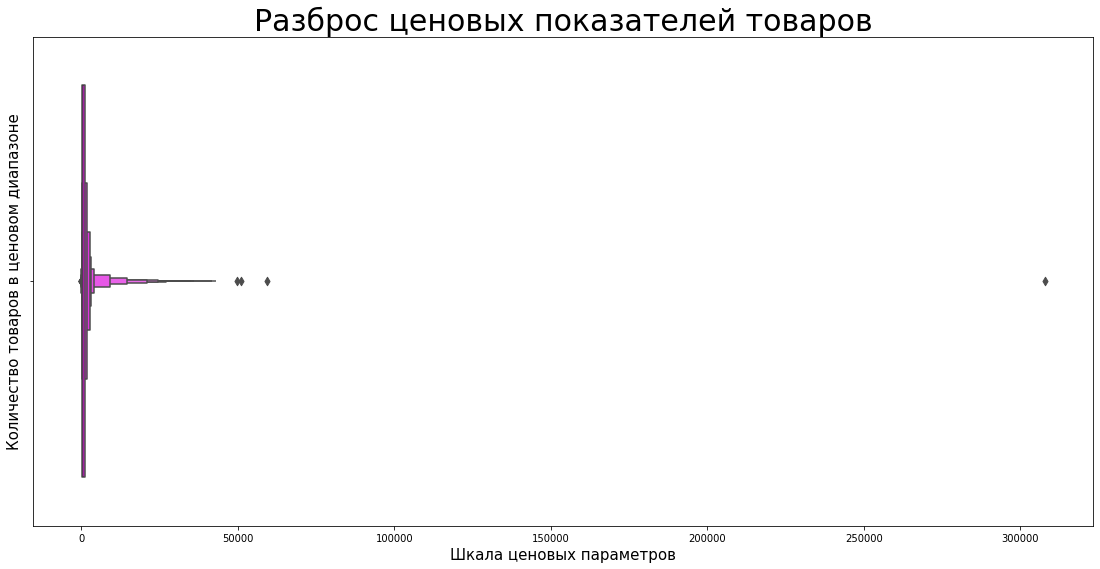

In [ ]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.boxenplot(data=sales_train, x='item_price', color = 'magenta')
plt.title('Разброс ценовых показателей товаров', fontsize = 30)
plt.xlabel('Шкала ценовых параметров', fontsize = 15)
plt.ylabel('Количество товаров в ценовом диапазоне', fontsize = 15)
plt.show()

Удаление строк обучающей таблицы, где стоимость товаров выше 3000 рублей.

In [ ]:
train = sales_train[(
    sales_train["item_price"] > 0) & (
    sales_train["item_price"] < 3000)]

In [ ]:
train.shape

(2844582, 6)

***Проверка полученной обучающей таблицы без экстримальных ценовых значений***

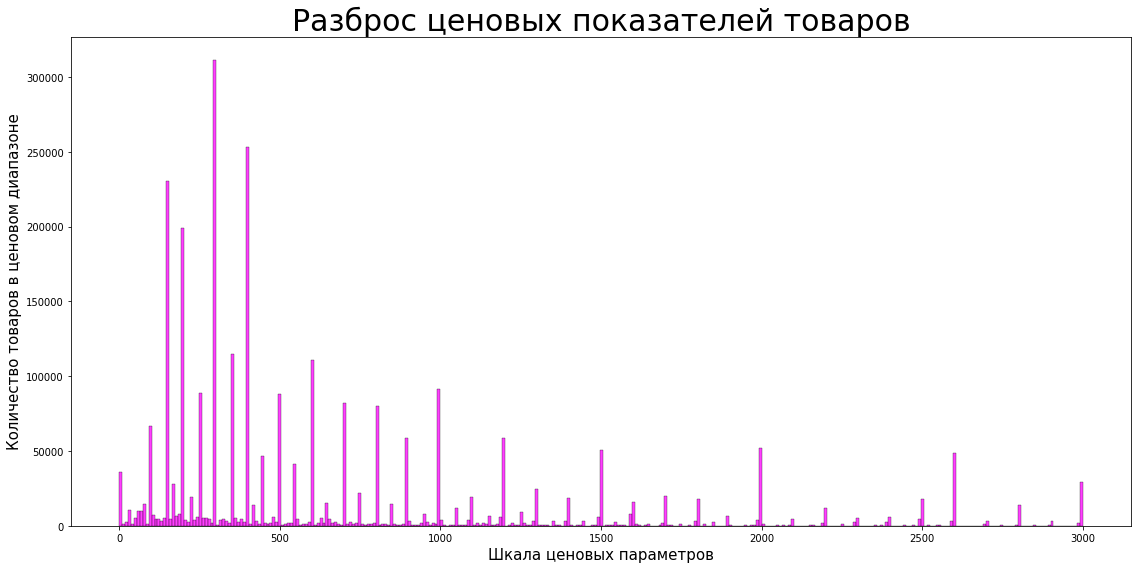

In [ ]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.histplot(data=train, x='item_price', color = 'magenta')
plt.title('Разброс ценовых показателей товаров', fontsize = 30)
plt.xlabel('Шкала ценовых параметров', fontsize = 15)
plt.ylabel('Количество товаров в ценовом диапазоне', fontsize = 15)
plt.show()

Ежеднено продается в среднем 200 товаров.
Отрицательные числа - означают возврат ранее проданных товаров.

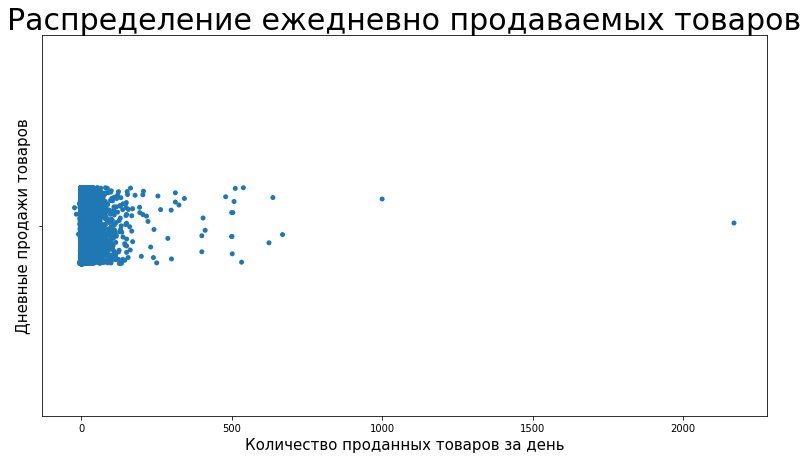

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.stripplot(data=train, x='item_cnt_day')
plt.title('Распределение ежедневно продаваемых товаров', fontsize = 30)
plt.xlabel('Количество проданных товаров за день', fontsize = 15)
plt.ylabel('Дневные продажи товаров', fontsize = 15)
plt.show()

Удаление возвращенных товаров (которые имеют отрицательное значение).

In [ ]:
sales_train_to_drop = train.drop(train[
    train['item_cnt_day'] < 0].index)

In [ ]:
print(sales_train.shape)
print()
print(sales_train_to_drop.shape)
print()
print(train.shape)
print()
train = sales_train_to_drop
print(train.shape)

(2935849, 6)

(2837785, 6)

(2844582, 6)

(2837785, 6)


**Проверка удаления строк с возвращенными товарами**

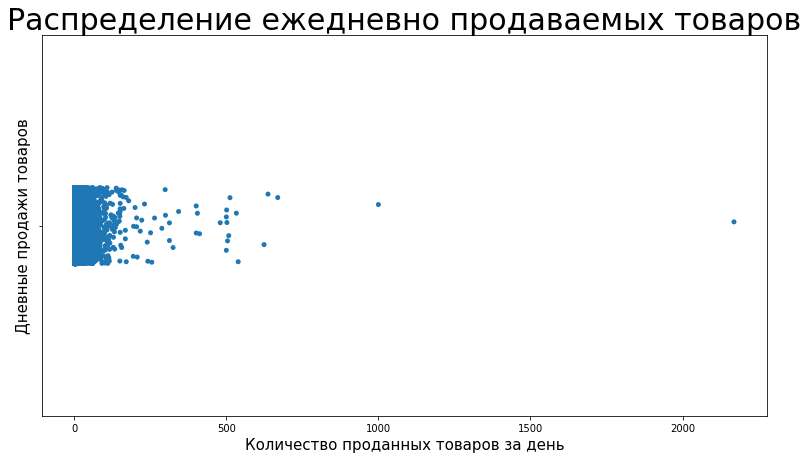

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.stripplot(data=train, x='item_cnt_day')
plt.title('Распределение ежедневно продаваемых товаров', fontsize = 30)
plt.xlabel('Количество проданных товаров за день', fontsize = 15)
plt.ylabel('Дневные продажи товаров', fontsize = 15)
plt.show()

**Удаление строк с экстремальным количеством продаж в течение дня**

In [ ]:
print(train['item_cnt_day'].describe())

count    2.837785e+06
mean     1.242750e+00
std      2.606868e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64


In [ ]:
sales_train_to_drop = train.drop(train[
    train['item_cnt_day'] > 500].index)
train = sales_train_to_drop

**Проверка удаления строк с экстремальным количеством проданных товаров за день**

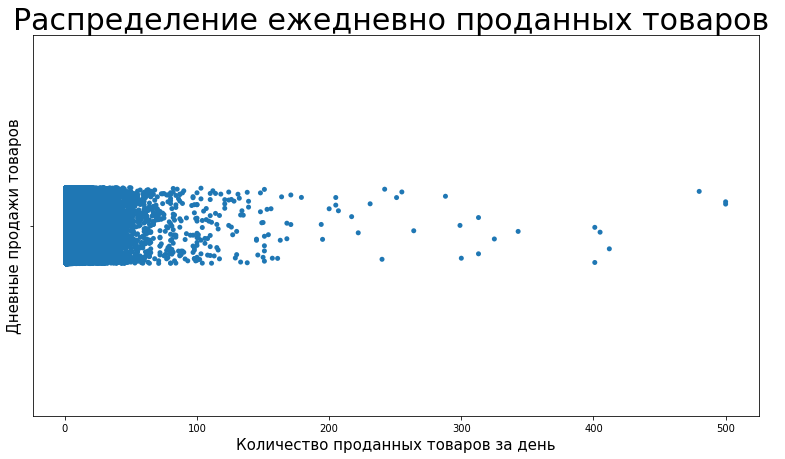

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.stripplot(data=train, x='item_cnt_day')
plt.title('Распределение ежедневно проданных товаров ', fontsize = 30)
plt.xlabel('Количество проданных товаров за день', fontsize = 15)
plt.ylabel('Дневные продажи товаров', fontsize = 15)
plt.show()

In [ ]:
sales_train_to_drop = train.drop(train[
    train['item_cnt_day'] > 26].index)
train = sales_train_to_drop

In [ ]:
train.shape

(2835843, 6)

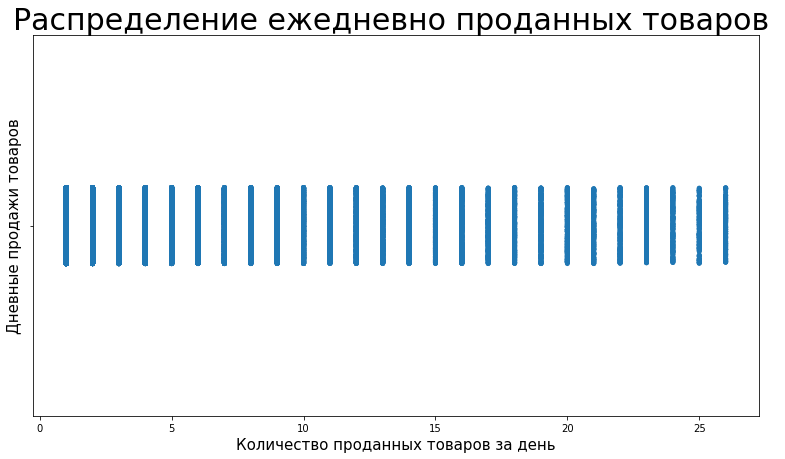

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.stripplot(data=train, x='item_cnt_day')
plt.title('Распределение ежедневно проданных товаров ', fontsize = 30)
plt.xlabel('Количество проданных товаров за день', fontsize = 15)
plt.ylabel('Дневные продажи товаров', fontsize = 15)
plt.show()

**Удаление дубликатов в названиях магазинов (Якутск, Жуковский).  Выбор магазинов в обучающей выборке, которые присутствуют в тестовой выборке**

In [ ]:
train["shop_id"] = train["shop_id"].replace({0: 57, 1: 58, 11: 10, 40: 39})

In [ ]:
print(train["shop_id"].unique())

[59 25 24 23 19 22 18 21 28 27 29 26  4  6  2  3  7 57 58 16 15  8 10 14
 13 12 53 31 30 32 35 56 54 47 50 42 43 52 51 41 38 44 37 46 45  5 55 17
  9 49 39 48 34 33 20 36]


In [ ]:
print(len(train["shop_id"].unique()))

56


In [ ]:
test["shop_id"].unique()


array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [ ]:
print(len(test["shop_id"].unique()))

42


***Удаление в обучаемой выборке названий магазинов, которые отсутствуют в тестовой.***

In [ ]:
train = train.loc[train.shop_id.isin(test["shop_id"].unique()), :]

In [ ]:
print(train["shop_id"].unique())
print()
print(train.shape)
print()
print(len(train["shop_id"].unique()))

[59 25 24 19 22 18 21 28 26  4  6  2  3  7 57 58 16 15 10 14 12 53 31 35
 56 47 50 42 52 41 38 44 37 46 45  5 55 49 39 48 34 36]

(2347536, 6)

42


In [ ]:
train = train.drop(columns=['date', 'item_price'])

In [ ]:
train

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
3,0,25,2554,1.0
4,0,25,2555,1.0
5,0,25,2564,1.0
...,...,...,...,...
2935844,33,25,7409,1.0
2935845,33,25,7460,1.0
2935846,33,25,7459,1.0
2935847,33,25,7440,1.0


***Извлечение данных из таблицы продаж за "33" - октябрь 2015 года***

In [ ]:
train_10_2015 = train[train['date_block_num'] == 33]
# train.info()
print()
print(train_10_2015)


         date_block_num  shop_id  item_id  item_cnt_day
2882335              33       45    13315           1.0
2882336              33       45    13880           1.0
2882337              33       45    13881           1.0
2882338              33       45    13881           1.0
2882339              33       45    13923           1.0
...                 ...      ...      ...           ...
2935844              33       25     7409           1.0
2935845              33       25     7460           1.0
2935846              33       25     7459           1.0
2935847              33       25     7440           1.0
2935848              33       25     7460           1.0

[47191 rows x 4 columns]


***Вычисление среднего размера продаж за последний месяц для магазина.***

In [ ]:
train_oct_mean_shop = train_10_2015.groupby(by='shop_id')['item_cnt_day'].mean().reset_index()
train_oct_mean_shop = train_oct_mean_shop.rename(columns={'item_cnt_day': 'oct_shop_mean'})
print()
print(train_oct_mean_shop.sort_values(by='oct_shop_mean', ascending=False))


    shop_id  oct_shop_mean
37       55       1.440741
7        12       1.428870
27       42       1.310381
16       25       1.275685
19       31       1.221200
17       26       1.217000
13       21       1.212057
25       39       1.201667
18       28       1.185825
23       37       1.183246
14       22       1.179811
2         4       1.177542
31       47       1.173415
8        14       1.142487
24       38       1.134593
11       18       1.131929
32       48       1.131257
15       24       1.130481
5         7       1.128337
10       16       1.125165
34       50       1.123656
1         3       1.123173
36       53       1.121107
4         6       1.118669
21       35       1.115556
29       45       1.112084
12       19       1.108985
20       34       1.107639
39       57       1.106177
0         2       1.104240
22       36       1.093863
9        15       1.093845
38       56       1.090233
30       46       1.088717
40       58       1.083199
3         5       1.080931


***Вычисление среднего размера продаж за последний месяц для категории товара.***

In [ ]:
train_oct_mean_item = train_10_2015.groupby(by='item_id')['item_cnt_day'].mean().reset_index()
train_oct_mean_item = train_oct_mean_item.rename(columns={'item_cnt_day': 'oct_item_mean'})
print()
print(train_oct_mean_item)
print()
print(train_oct_mean_item.info())
print()
print(train_oct_mean_item['oct_item_mean'].describe())


      item_id  oct_item_mean
0          30       1.000000
1          31       1.000000
2          32       1.000000
3          33       1.000000
4          40       1.000000
...       ...            ...
5062    22162       1.000000
5063    22163       1.040000
5064    22164       1.000000
5065    22166       1.833333
5066    22167       1.156250

[5067 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        5067 non-null   int64  
 1   oct_item_mean  5067 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 79.3 KB
None

count    5067.000000
mean        1.047791
std         0.391645
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: oct_item_mean, dtype: float64



***Извлечение данных из таблицы продаж за "24 - 33" - 2015 год***

In [ ]:
train_2015 = train[train['date_block_num'] >= 24]
# train.info()
print()
print(train_2015)


         date_block_num  shop_id  item_id  item_cnt_day
2324647              24        7    19436           1.0
2324650              24       15     5319           2.0
2324651              24       15     5319           1.0
2324652              24       15     5331           1.0
2324653              24       15     5747           1.0
...                 ...      ...      ...           ...
2935844              33       25     7409           1.0
2935845              33       25     7460           1.0
2935846              33       25     7459           1.0
2935847              33       25     7440           1.0
2935848              33       25     7460           1.0

[523395 rows x 4 columns]


***Вычисление среднего размера продаж за последний год для магазина.***

In [ ]:
train_2015_mean_shop = train_2015.groupby(by='shop_id')['item_cnt_day'].mean().reset_index()
train_2015_mean_shop = train_2015_mean_shop.rename(columns={'item_cnt_day': '2015_shop_mean'})
print()
print(train_2015_mean_shop.sort_values(by='2015_shop_mean', ascending=False))


    shop_id  2015_shop_mean
37       55        1.666836
7        12        1.566834
27       42        1.276876
14       22        1.238925
19       31        1.233887
16       25        1.221227
18       28        1.218978
25       39        1.196850
8        14        1.185646
31       47        1.182378
41       59        1.169006
17       26        1.168303
13       21        1.168058
15       24        1.165428
0         2        1.142659
21       35        1.138693
23       37        1.138227
11       18        1.138225
10       16        1.136029
2         4        1.134636
39       57        1.134069
26       41        1.129014
6        10        1.126453
4         6        1.125102
9        15        1.123475
5         7        1.123383
24       38        1.121782
30       46        1.120955
36       53        1.120653
12       19        1.116668
20       34        1.110983
29       45        1.109927
34       50        1.108378
40       58        1.107401
1         3        

***Вычисление среднего размера продаж за последний год для категории товара.***

In [ ]:
train_2015_mean_item = train_2015.groupby(by='item_id')['item_cnt_day'].mean().reset_index()
train_2015_mean_item = train_2015_mean_item.rename(columns={'item_cnt_day': '2015_item_mean'})
print()
print(train_2015_mean_item)
print()
print(train_2015_mean_item.info())
print()
print(train_2015_mean_item['2015_item_mean'].describe())


       item_id  2015_item_mean
0           30        1.000000
1           31        1.019737
2           32        1.046025
3           33        1.000000
4           36        1.000000
...        ...             ...
10610    22162        1.250000
10611    22163        1.057143
10612    22164        1.213296
10613    22166        1.166667
10614    22167        1.129964

[10615 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         10615 non-null  int64  
 1   2015_item_mean  10615 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 166.0 KB
None

count    10615.000000
mean         1.057748
std          0.348840
min          1.000000
25%          1.000000
50%          1.000000
75%          1.016129
max         14.250000
Name: 2015_item_mean, dtype: float64


***Создание столбца Ноябрь 2015 из значений октября 2015 + случайные товары из средних значений***


In [ ]:
train_11_2015 = train_10_2015

In [ ]:
train_11_2015['date_block_num'] = train_11_2015['date_block_num'].replace({33: 34})
train_11_2015 = train_11_2015.reset_index(drop = True)

new_index = np.arange(2935849,  2983040, 1, dtype=int)
train_11_2015 = train_11_2015.set_index(new_index)
print(new_index)
# 2935848 np.arange(0, 5, 0.5, dtype=int)
print(train_11_2015)

[2935849 2935850 2935851 ... 2983037 2983038 2983039]
         date_block_num  shop_id  item_id  item_cnt_day
2935849              34       45    13315           1.0
2935850              34       45    13880           1.0
2935851              34       45    13881           1.0
2935852              34       45    13881           1.0
2935853              34       45    13923           1.0
...                 ...      ...      ...           ...
2983035              34       25     7409           1.0
2983036              34       25     7460           1.0
2983037              34       25     7459           1.0
2983038              34       25     7440           1.0
2983039              34       25     7460           1.0

[47191 rows x 4 columns]


<ipython-input-63-56989fcc4105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_11_2015['date_block_num'] = train_11_2015['date_block_num'].replace({33: 34})


***Список магазинов с наибольшими продажами товаров***

55   Цифровой склад 1С-Онлайн,

12   Интернет-магазин ЧС,

42  "СПб ТК "Невский Центр",

25  "Москва ТРК "Атриум",

31  "Москва ТЦ "Семеновский"

In [ ]:
from random import choice


data_november = train_2015_mean_item['item_id'].to_list()
popular_stores = [55, 12, 42, 25, 31]

def fill_november_2015():
  result = []
  lim_number = 0
  store_num = None
  item_val = None
  cur_row = None
  for n in popular_stores:
    if n == 55:
      lim_number = 800
      store_num = 55
    elif n == 12:
      lim_number = 700
      store_num = 12
    elif n == 42:
      lim_number = 500
      store_num = 42
    elif n == 25:
      lim_number = 400
      store_num = 25
    else:
      lim_number = 350
      store_num = 31
    for i in range(lim_number):
      item_val = choice(data_november)
      cur_row = train_2015_mean_item['2015_item_mean'][train_2015_mean_item['item_id'] == item_val]
      result.append(
                    [34,
                    store_num,
                    choice(data_november),
                    *cur_row])
  return result


In [ ]:
res = fill_november_2015()
print(len(res))

2750


In [ ]:
november_index = np.arange(2983041,  2985791, 1, dtype=int)
more_november = pd.DataFrame(res,
                  index = november_index,
                  columns =['date_block_num',
                            'shop_id',
                            'item_id',
                            'item_cnt_day'],
                  )

In [ ]:
more_november

,date_block_num,shop_id,item_id,item_cnt_day
2983041,34,55,2730,1.000000
2983042,34,55,4053,1.040000
2983043,34,55,18274,1.010256
2983044,34,55,6779,1.000000
2983045,34,55,22021,1.000000
...,...,...,...,...
2985786,34,31,12478,1.000000
2985787,34,31,15499,1.000000
2985788,34,31,4056,1.066667
2985789,34,31,11731,1.500000


In [ ]:
train = pd.concat([train, train_11_2015, more_november])

In [ ]:
train


,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.000000
1,0,25,2552,1.000000
3,0,25,2554,1.000000
4,0,25,2555,1.000000
5,0,25,2564,1.000000
...,...,...,...,...
2985786,34,31,12478,1.000000
2985787,34,31,15499,1.000000
2985788,34,31,4056,1.066667
2985789,34,31,11731,1.500000


***Вычисление количества продаж в октябре и ноябре 2013, 2014 и 2015***

In [ ]:
print(len(train[train['date_block_num'] == 9]))
print(len(train[train['date_block_num'] == 10]))
print(len(train[train['date_block_num'] == 9]) / len(train[train['date_block_num'] == 10]))
print(len(train[train['date_block_num'] == 21]))
print(len(train[train['date_block_num'] == 22]))
print(len(train[train['date_block_num'] == 21]) / len(train[train['date_block_num'] == 22]))
print(len(train[train['date_block_num'] == 33]))
print(len(train[train['date_block_num'] == 34]))
print(len(train[train['date_block_num'] == 33]) / len(train[train['date_block_num'] == 34]))


73459
76671
0.958106715707373
61029
66895
0.9123103370954481
47191
49941
0.9449350233275264


***Еще одна проверка количества проданных товаров по месяцам.***


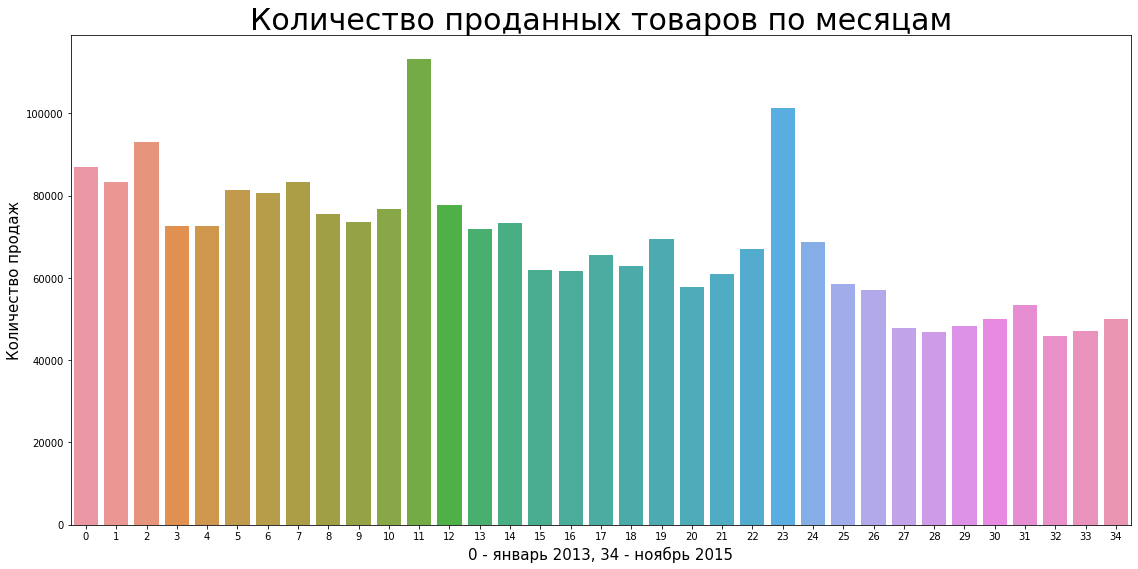

In [ ]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(data=train, x='date_block_num')
plt.title('Количество проданных товаров по месяцам', fontsize = 30)
plt.xlabel('0 - январь 2013, 34 - ноябрь 2015', fontsize = 15)
plt.ylabel('Количество продаж', fontsize = 15)
plt.show()

# **2.Создание модели**

---



# 2.1. Линейные модели для ноября 2015 года

***Объединение в одну итоговую таблицу.***

In [ ]:
train['date_block_num'] = train['date_block_num'].replace({34: 'Nov2015'})

In [ ]:
train_pvt = train.pivot_table(index=['shop_id','item_id'],
                 columns='date_block_num', fill_value = 0).reset_index()

In [ ]:
train_pvt[('item_cnt_day', 'Nov2015')]

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
329811    0.0
329812    0.0
329813    0.0
329814    0.0
329815    0.0
Name: (item_cnt_day, Nov2015), Length: 329816, dtype: float64

In [ ]:
train_final = pd.merge(test, train_pvt, on = ['item_id', 'shop_id'], how = 'left')

<ipython-input-75-19fca14a211b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  train_final = pd.merge(test, train_pvt, on = ['item_id', 'shop_id'], how = 'left')
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
train_final = train_final.fillna(0)

In [ ]:
train_final

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)","(item_cnt_day, Nov2015)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, max_error

X = train_final.drop(columns=[('item_cnt_day', 'Nov2015')])
y = train_final[('item_cnt_day', 'Nov2015')]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                      random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print(X.shape,
y.shape,
X_train.shape,
X_valid.shape,
y_train.shape,
y_valid.shape)

(214200, 37) (214200,) (171360, 37) (42840, 37) (171360,) (42840,)


In [ ]:
print('MSE for LR:', mean_squared_error(y_valid, y_pred_lr))
print('MAX ERROR for LR', max_error(y_valid, y_pred_lr))

MAE for LR: 0.004827474577825245
MAX ERROR for LR 2.9693426640587894


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


model_knn = KNeighborsRegressor(n_neighbors = 3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print('MSE for KNN:', mean_squared_error(y_valid, y_pred_knn))
print('MAX ERROR for KNN', max_error(y_valid, y_pred_knn))

MAE for KNN: 0.14602503808987308
MAX ERROR for KNN 13.42962962962963


# 2.2. Модель бустинга для ноября 2015 года

***Установка CatBoost***


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.3 MB/s eta 0:00:00


In [ ]:
import catboost as cb
import lightgbm as lgb

In [ ]:
CB_model = cb.CatBoostRegressor()
LGB_model = lgb.LGBMRegressor()

CB_model.fit(X_train, y_train)
LGB_model.fit(X_train, y_train)

Learning rate set to 0.092286
0:	learn: 0.3417191	total: 171ms	remaining: 2m 50s
1:	learn: 0.3130647	total: 281ms	remaining: 2m 20s
2:	learn: 0.2873959	total: 384ms	remaining: 2m 7s
3:	learn: 0.2642261	total: 516ms	remaining: 2m 8s
4:	learn: 0.2433571	total: 594ms	remaining: 1m 58s
5:	learn: 0.2244381	total: 664ms	remaining: 1m 49s
6:	learn: 0.2073290	total: 741ms	remaining: 1m 45s
7:	learn: 0.1921040	total: 824ms	remaining: 1m 42s
8:	learn: 0.1786484	total: 905ms	remaining: 1m 39s
9:	learn: 0.1664058	total: 1s	remaining: 1m 39s
10:	learn: 0.1554662	total: 1.11s	remaining: 1m 40s
11:	learn: 0.1458219	total: 1.24s	remaining: 1m 41s
12:	learn: 0.1373374	total: 1.31s	remaining: 1m 39s
13:	learn: 0.1298185	total: 1.4s	remaining: 1m 38s
14:	learn: 0.1231451	total: 1.47s	remaining: 1m 36s
15:	learn: 0.1173756	total: 1.53s	remaining: 1m 34s
16:	learn: 0.1122929	total: 1.62s	remaining: 1m 33s
17:	learn: 0.1078985	total: 1.72s	remaining: 1m 33s
18:	learn: 0.1041124	total: 1.81s	remaining: 1m 33

LGBMRegressor()

In [ ]:
test_predict_CB = CB_model.predict(X_valid)

In [ ]:
print('MSE test dataset for Catboost:', mean_squared_error(y_valid, test_predict_CB))

MAE test dataset for Catboost: 0.005137210578392914


In [ ]:
test_predict_LGB = LGB_model.predict(X_valid)

In [ ]:
print('MSE test dataset for LGB:', mean_squared_error(y_valid, test_predict_LGB))

MAE test dataset for LGB: 0.005395915108884798
